In [1]:
import os
import time 
import uuid 
import cv2 
import urllib
import numpy as np 

In [2]:
IMAGES_PATH = os.path.join('data', 'images')
number_images= 30 

In [14]:
# url = "http://192.168.1.71:8080/shot.jpg"
# while True:
#     imgResp = urllib.request.urlopen(url)
#     imgNp = np.array(bytearray(imgResp.read()),dtype=np.uint8)
#     img = cv2.imdecode(imgNp, -1 ) 
#     cv2.imshow('test',img)
#     cv2.waitKey(10)
#     if ord('q') == cv2.waitKey(10):
#         exit(0)

In [16]:
url = "http://192.168.1.9:8080/shot.jpg"
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    imgResp = urllib.request.urlopen(url)
    imgNp = np.array(bytearray(imgResp.read()),dtype=np.uint8)
    img = cv2.imdecode(imgNp, -1 ) 
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, img)
    cv2.imshow('frame', img)
    time.sleep(0.5)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

In [ ]:
# cap = cv2.VideoCapture("http://192.168.1.67:8080/shot.jpg")
# if not cap.isOpened():
#     print("error:Couldn't open Video capture.")
# for imgnum in range(number_images):
#     print('Collecting image {}'.format(imgnum))
#     ret, frame = cap.read()
#     if not ret:
#         print("Error:Couldn't read frame.")
#         break
#     imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
#     cv2.imwrite(imgname, frame)
#     cv2.imshow('frame', frame)
#     time.sleep(0.5)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()


In [18]:
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: /home/zanam/.labelmerc


In [3]:
import tensorflow as tf 
import json
import numpy as np 
import matplotlib.pyplot as plt 

2023-12-24 21:58:43.614960: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-24 21:58:43.614995: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-24 21:58:43.615642: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-24 21:58:43.619496: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-24 21:58:44.237916: W tensorflow/compiler/tf2

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu,True)

2023-12-24 21:58:46.551947: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-24 21:58:46.578139: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-24 21:58:46.578346: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
images = tf.data.Dataset.list_files('data/images/*.jpg',shuffle = False)

In [13]:
images.as_numpy_iterator().next()

b'data/images/5f046bfc-a256-11ee-9804-e00af637fbdf.jpg'

In [16]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [17]:

type(images)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

In [18]:
images = images.map(load_image)

In [19]:
images.as_numpy_iterator().next()

array([[[37, 37, 37],
        [38, 38, 38],
        [38, 38, 38],
        ...,
        [22, 56, 40],
        [15, 60, 40],
        [12, 61, 40]],

       [[37, 37, 37],
        [37, 37, 37],
        [38, 38, 38],
        ...,
        [23, 55, 40],
        [17, 58, 40],
        [15, 60, 40]],

       [[36, 36, 36],
        [37, 37, 37],
        [37, 37, 37],
        ...,
        [29, 53, 40],
        [23, 55, 40],
        [22, 56, 40]],

       ...,

       [[16, 12,  9],
        [16, 12,  9],
        [16, 12,  9],
        ...,
        [24, 12, 16],
        [24, 12, 16],
        [24, 12, 16]],

       [[16, 12,  9],
        [16, 12,  9],
        [16, 12,  9],
        ...,
        [24, 12, 16],
        [24, 12, 16],
        [24, 12, 16]],

       [[17, 13, 10],
        [17, 13, 10],
        [17, 13, 10],
        ...,
        [24, 12, 16],
        [24, 12, 16],
        [24, 12, 16]]], dtype=uint8)

In [20]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [30]:
image_generator= images.batch(4).as_numpy_iterator()

In [76]:
plot_images = image_generator.next()


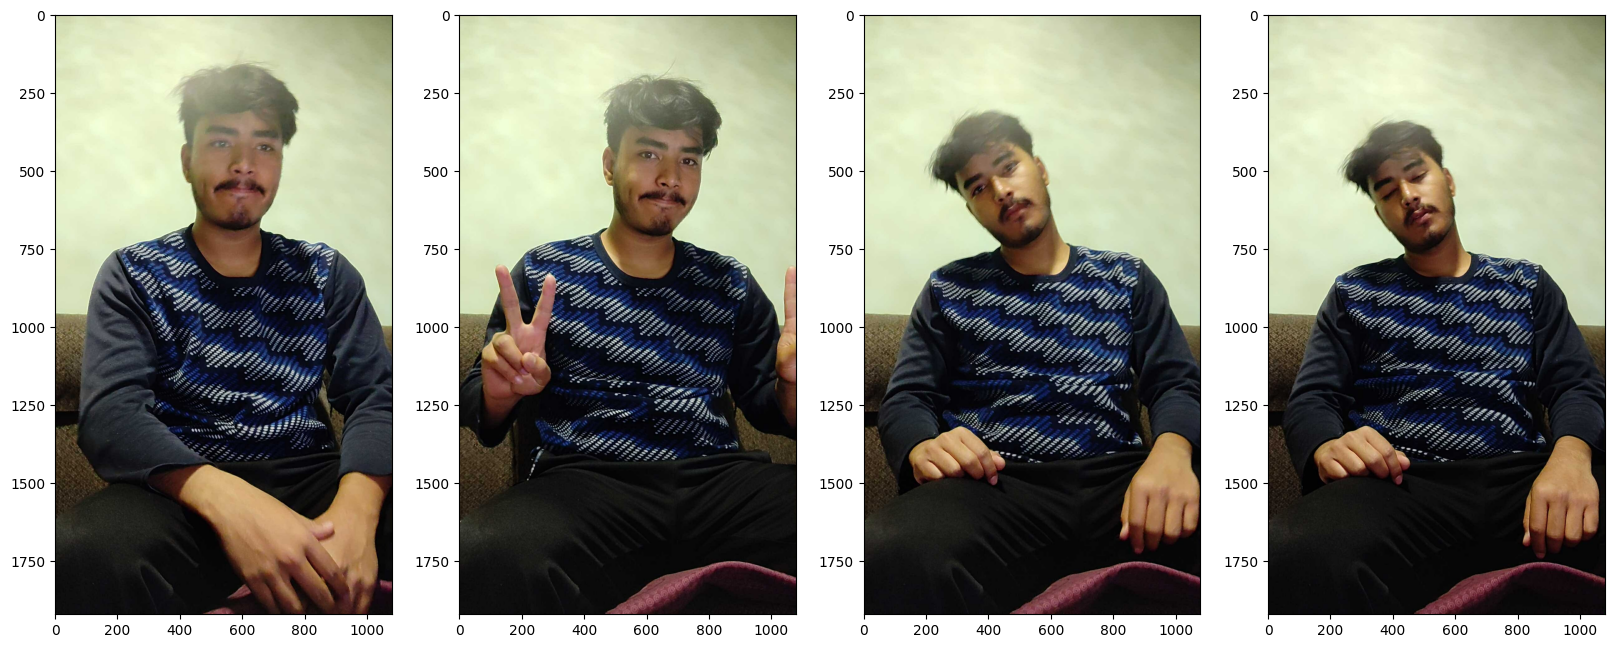

In [77]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()





|
***Moving label datas to their respective folders, ie train->label, test->lable, val->label***

In [ ]:

for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

Applying the Image Augmentation now 

In [88]:
import albumentations as alb

In [93]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [97]:
img = cv2.imread(os.path.join('data','train', 'images','112fe4c0-a1ba-11ee-a343-e00af637fbdf.jpg'))


In [95]:
img.shape

(1080, 1920, 3)

In [99]:
with open(os.path.join('data', 'train', 'labels', '112fe4c0-a1ba-11ee-a343-e00af637fbdf.json'), 'r') as f:
    label = json.load(f)

In [100]:
label['shapes'][0]['points']

[[733.8095238095237, 141.78571428571425],
 [1171.904761904762, 698.9285714285714]]

In [101]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [102]:
coords

[733.8095238095237, 141.78571428571425, 1171.904761904762, 698.9285714285714]

In [106]:
coords = list(np.divide(coords, [1920,1080,1920,1080]))

In [107]:
coords

[0.0005971757192460317,
 0.00027350639329805994,
 0.0009536985367063492,
 0.0013482418430335098]

In [108]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])